In [1]:
from population import PopulationGeneratorConfig, Distance, PopulationGenerationDistributionKind, PopulationGenerationEpicentre, generate_data_points
from clusters import Cluster, ClusterCentreStrategy
from pathing import get_paths_between_clusters, get_path_data, create_cluster_graph
from utils import visualize_clusters, visualize_points, visualize_paths
import h3
import pathlib
import folium
import osmnx
import networkx as nx

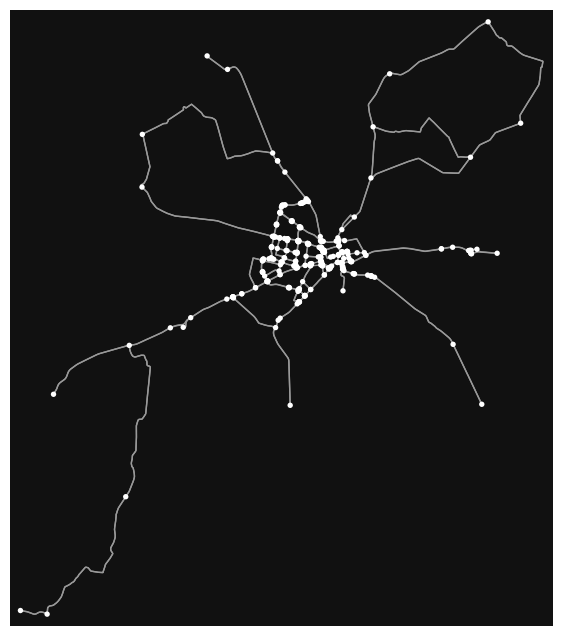

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [2]:
config = PopulationGeneratorConfig.from_json_file(pathlib.Path("configs/slupsk_2004.json"))
cluster_centre_strategy = ClusterCentreStrategy.HEXAGON_CENTER
pts_by_epi = {epi.label: generate_data_points(epi) for epi in config.epicentres}

colors = ["blue", "red", "green"]
pts_by_color = list(zip(colors, pts_by_epi.values()))
points = [point for pts in pts_by_epi.values() for point in pts]
places = [
    'Słupsk, Polska',
    'gmina Słupsk, Polska',
    'gmina Kobylnica, Polska',
]
custom_filter = '["highway"~"motorway|primary|secondary|tertiary"]'
# custom_filter = None
graph = osmnx.graph.graph_from_place(places, network_type="drive", custom_filter=custom_filter)
graph = osmnx.speed.add_edge_travel_times(osmnx.add_edge_speeds(graph))
# osmnx.speed.add_edge_travel_times(graph)
clusters = Cluster.clusterize_points(points, 8, cluster_centre_strategy)
osmnx.plot_graph(graph)

In [3]:
atlas = get_paths_between_clusters(graph, clusters)
paths = atlas.get_paths()
paths

[[2957641188,
  258135187,
  1844602120,
  10223864121,
  10223864118,
  2461136682,
  1324849777,
  1324849773,
  1840004037,
  2967162839],
 [2957641188,
  258135187,
  2269093747,
  2112750385,
  258135145,
  258135185,
  258136891,
  258136888,
  3957667161,
  3958824912,
  258134894,
  2960246566,
  258135229,
  2960242359],
 [2957641188,
  258135187,
  2269093747,
  2461136066,
  1364154307,
  1161540446,
  2965757252,
  2325962296,
  1840038879,
  258136804,
  258135121],
 [2957641188,
  258135187,
  2269093747,
  2112750385,
  258135145,
  258135185,
  258136891,
  258136473,
  258135966,
  258135964,
  258136118,
  1161201994],
 [2957641188,
  258135187,
  2269093747,
  2461136066,
  1364154307,
  1161540889,
  1161540290,
  1161540201,
  1161540391,
  1165193062,
  258135729,
  5838748713,
  6341683678,
  2965756580,
  258135643,
  1161693667,
  1161693804,
  2461150155,
  2609806067,
  1161693626,
  1161693609,
  1161693612,
  1161693758,
  1839946169,
  258140799,
  1161693

In [4]:
m = folium.Map(location=[54.46270136314862, 17.019373399360482], zoom_start=13, tiles='cartodbpositron')
visualize_paths(m, graph, paths)
visualize_clusters(m, clusters, ['green'])
visualize_points(m, [cluster.centre for cluster in clusters], ['red'])
m

In [5]:
osmnx.folium.plot_graph_folium(graph, graph_map=m)

In [6]:
path = paths[0]

In [7]:
get_path_data(path, graph, 8, {cluster.h3_hex_id: cluster for cluster in clusters})

[{'osmid': 292219781, 'oneway': True, 'name': 'Grodzka', 'highway': 'tertiary_link', 'reversed': False, 'length': 26.065999999999995, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f2e46fd4a90>, 'speed_kph': 50.0, 'travel_time': 1.9}, {'osmid': [201318611, 615168484], 'oneway': True, 'lanes': ['1', '2'], 'name': 'Jana Kilińskiego', 'highway': 'tertiary', 'reversed': False, 'length': 62.897, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f2e46f98880>, 'speed_kph': 44.7, 'travel_time': 5.1}, {'osmid': [263551110, 263551111, 173691854, 1117846936, 233728859], 'name': 'Jana Kilińskiego', 'highway': 'tertiary', 'oneway': False, 'reversed': True, 'length': 635.8209999999999, 'bridge': 'yes', 'maxspeed': '50', 'geometry': <shapely.geometry.linestring.LineString object at 0x7f2e46f98be0>, 'speed_kph': 50.0, 'travel_time': 45.8}, {'osmid': 1117846937, 'ref': '213', 'highway': 'secondary', 'junction': 'roundabout', 'oneway': True, 'reversed': False, 'length': 

PathData(start_cluster='881f0d4547fffff', end_cluster='881f0d4543fffff', minimal_maximal_speed=<distance.Speed object at 0x7f2e465c8a90>, minimal_lane_count=1, length=<distance.Distance object at 0x7f2e465c8970>, crosses_other_clusters=False)

In [9]:
cluster_graph = create_cluster_graph(graph, clusters, 8)

[{'osmid': 292219781, 'oneway': True, 'name': 'Grodzka', 'highway': 'tertiary_link', 'reversed': False, 'length': 26.065999999999995, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f2e46fd4a90>, 'speed_kph': 50.0, 'travel_time': 1.9}, {'osmid': [201318611, 615168484], 'oneway': True, 'lanes': ['1', '2'], 'name': 'Jana Kilińskiego', 'highway': 'tertiary', 'reversed': False, 'length': 62.897, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f2e46f98880>, 'speed_kph': 44.7, 'travel_time': 5.1}, {'osmid': [263551110, 263551111, 173691854, 1117846936, 233728859], 'name': 'Jana Kilińskiego', 'highway': 'tertiary', 'oneway': False, 'reversed': True, 'length': 635.8209999999999, 'bridge': 'yes', 'maxspeed': '50', 'geometry': <shapely.geometry.linestring.LineString object at 0x7f2e46f98be0>, 'speed_kph': 50.0, 'travel_time': 45.8}, {'osmid': 1117846937, 'ref': '213', 'highway': 'secondary', 'junction': 'roundabout', 'oneway': True, 'reversed': False, 'length': 

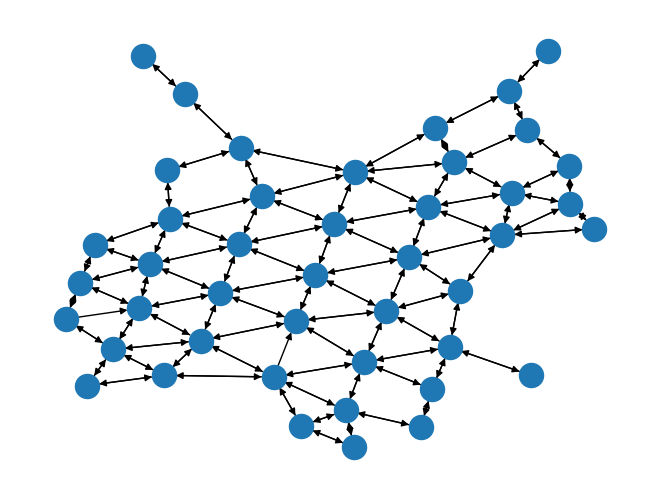

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

pos = nx.spring_layout(cluster_graph, seed=200)
nx.draw(cluster_graph, pos)
plt.show()